In [3]:
import pandas as pd
import matplotlib.dates as mdates
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from ydata_profiling import ProfileReport

In [5]:
df_ventes = pd.read_csv("C:/Users/Elizabeth S/Downloads/data/ventes.csv")
df_clients = pd.read_csv("C:/Users/Elizabeth S/Downloads/data/clients.csv", sep=";")
df_produits = pd.read_csv("C:/Users/Elizabeth S/Downloads/data/produits_sous-categorie.csv")

df_ventes.head()

id_prod                        date session_id client_id  quantity_sold
0  0_1483  2021-04-10 18:37:28.723910    s_18746    c_4450              5
1   2_226  2022-02-03 01:55:53.276402   s_159142     c_277              6
2   1_374  2021-09-23 15:13:46.938559    s_94290    c_4270              3
3  0_2186  2021-10-17 03:27:18.783634   s_105936    c_4597              8
4  0_1351  2021-07-17 20:34:25.800563    s_63642    c_1242              2

In [6]:
df_clients.head()

client_id sex  birth
0    c_4410   f   1967
1    c_7839   f   1975
2    c_1699   f   1984
3    c_5961   f   1962
4    c_5320   m   1943

In [7]:
df_produits.head()

product_id     category sub_category  price  stock_quantity
0     0_1421    Vêtements     T-shirts  19.99              39
1     0_1368    Vêtements     T-shirts   5.13              76
2      0_731    Vêtements     T-shirts  17.99               2
3      1_587  Accessoires  Sacs à main   4.99              55
4     0_1507    Vêtements     T-shirts   3.99              81

In [15]:
ventes_missing = df_ventes.isnull().sum()
clients_missing = df_clients.isnull().sum()
produits_missing = df_produits.isnull().sum()
# Display missing values and inconsistencies
print("Missing Values in Sales Data:\n", ventes_missing)
print("Missing Values in Clients Data:\n", clients_missing)
print("Missing Values in Product Data:\n", produits_missing)

Missing Values in Sales Data:
 id_prod          0
date             0
session_id       0
client_id        0
quantity_sold    0
dtype: int64
Missing Values in Clients Data:
 client_id    0
sex          0
birth        0
dtype: int64
Missing Values in Product Data:
 product_id        0
category          0
sub_category      0
price             0
stock_quantity    0
dtype: int64


### I have to detect anomalies such as missing products in the sales table, negative prices, and strange quantities.

In [17]:
negative_births = df_clients[df_clients['birth'] < 0]
print("Negative Birth Years:")
print(negative_births)

Negative Birth Years:
     client_id sex  birth
8494      ct_1   m  -2001


In [19]:
df_clients['birth'] = df_clients['birth'].abs()
negative_births = df_clients[df_clients['birth'] < 0]
print("Negative Birth Years:")
print(negative_births)

Negative Birth Years:
Empty DataFrame
Columns: [client_id, sex, birth]
Index: []


In [21]:
# Convert the 'date' column to datetime format
df_ventes['date'] = pd.to_datetime(df_ventes['date'], errors='coerce')

In [105]:
# Anomaly detection in sales: there are  sales for products that do not exist in the product table
missing_products_in_sales = df_ventes[~df_ventes['id_prod'].isin(df_produits['product_id'])]
print(f"Sales for products missing in the product table:\n{missing_products_in_sales}")

Sales for products missing in the product table:
       id_prod                       date session_id client_id  quantity_sold
6235    0_2245 2021-06-17 03:03:12.668129    s_49705    c_1533             10
10802   0_2245 2021-06-16 05:53:01.627491    s_49323    c_7954              2
14051   0_2245 2021-11-24 17:35:59.911427   s_124474    c_5120              5
17486   0_2245 2022-02-28 18:08:49.875709   s_172304    c_4964              7
21078   0_2245 2021-03-01 00:09:29.301897        s_3     c_580             10
...        ...                        ...        ...       ...            ...
322710  0_2245 2021-04-06 19:59:19.462288    s_16936    c_4167              8
329417  0_2245 2021-03-30 23:29:02.347672    s_13738    c_7790              5
330490  0_2245 2021-12-03 14:14:40.444177   s_128815    c_6189              2
335531  0_2245 2021-04-27 18:58:47.703374    s_26624    c_1595              2
336220  0_2245 2021-05-01 03:35:03.146305    s_28235    c_5714              5

[103 rows x 5 

In [108]:
anomalous_prices = df_produits [(df_produits ['price'] < 1) | (df_produits ['price'] > 10000)]
print(f"Anomalous prices in products:\n{anomalous_prices}")

Anomalous prices in products:
     product_id   category sub_category  price  stock_quantity
145      0_1203  Vêtements     T-shirts   0.99              83
370       0_120  Vêtements     T-shirts   0.66              77
686      0_2138  Vêtements     T-shirts   0.93              60
731         T_0  Vêtements     T-shirts  -1.00              89
801      0_2166  Vêtements     T-shirts   0.97              29
848       0_180  Vêtements     T-shirts   0.97              96
946      0_2169  Vêtements     T-shirts   0.99              64
985      0_2275  Vêtements     T-shirts   0.99              77
991      0_1329  Vêtements     T-shirts   0.99              52
1211     0_1844  Vêtements     T-shirts   0.77              51
1530     0_1620  Vêtements     T-shirts   0.80              50
1784     0_1771  Vêtements     T-shirts   0.99              21
1911     0_1539  Vêtements     T-shirts   0.99              87
1973       0_91  Vêtements     T-shirts   0.99              75
2018     0_1759  Vêtement

In [110]:
df_produits = df_produits[df_produits['price'] != -1.00]
print(df_produits[df_produits['price'] < 0])

Empty DataFrame
Columns: [product_id, category, sub_category, price, stock_quantity]
Index: []


In [112]:
# Anomalies in quantity sold
anomalous_quantities_sold = df_ventes[(df_ventes['quantity_sold'] <= 0) | (df_ventes['quantity_sold'] > 1000)]
print(f"Anomalous quantities sold:\n{anomalous_quantities_sold}")

Anomalous quantities sold:
Empty DataFrame
Columns: [id_prod, date, session_id, client_id, quantity_sold]
Index: []


In [114]:
report = {
    'Missing products in sales': len(missing_products_in_sales),
    'Anomalous prices': len(anomalous_prices),
    'Anomalous sales quantities': len(anomalous_quantities_sold),
}

print("Anomalies Report and Corrective Actions:")
for key, value in report.items():
    print(f"{key}: {value}")

Anomalies Report and Corrective Actions:
Missing products in sales: 103
Anomalous prices: 30
Anomalous sales quantities: 0


## # i want to merge sales data with product data to include 'category', 'sub_category', and 'price' in the sales table

In [51]:
sales_with_subcategory_df = pd.merge(df_ventes, df_produits[['product_id', 'category', 'sub_category', 'price', 'stock_quantity']],                   
                                     left_on='id_prod', right_on='product_id', how='left')

In [52]:
# all client IDs in sales are present in clients
valid_sales_df = sales_with_subcategory_df[sales_with_subcategory_df['client_id'].isin(df_clients['client_id'])]

valid_sales_df = pd.merge(valid_sales_df, df_clients[['client_id', 'birth']], on='client_id', how='left')

# Add 'age' column to sales data by calculating from the 'birth' column in the clients table
valid_sales_df['age'] = 2024 - valid_sales_df['birth']

In [54]:
# # Ensure 'date' is in datetime format
# valid_sales_df['date'] = pd.to_datetime(valid_sales_df['date'], errors='coerce')

# Identify rows where 'date' is NaT
missing_day_df = valid_sales_df[valid_sales_df['date'].isna()]

# Display rows where the 'day' value is missing
print(missing_day_df[['id_prod', 'date']])

       id_prod date
1431       T_0  NaT
2365       T_0  NaT
2895       T_0  NaT
5955       T_0  NaT
7283       T_0  NaT
...        ...  ...
332594     T_0  NaT
332705     T_0  NaT
332730     T_0  NaT
333442     T_0  NaT
335279     T_0  NaT

[200 rows x 2 columns]


In [55]:
valid_sales_df = valid_sales_df.dropna(subset=['date'])

In [59]:
valid_sales_df['year'] = valid_sales_df['date'].dt.year.astype(int)
valid_sales_df['month'] = valid_sales_df['date'].dt.strftime('%B') 
valid_sales_df['day'] = valid_sales_df['date'].dt.day.astype(int)
valid_sales_df['time'] = valid_sales_df['date'].dt.strftime('%H:%M:%S') 

#i just reorder columns to place 'year', 'month', 'day', and 'time' right after 'id_prod'
columns = ['id_prod', 'year', 'month', 'day', 'time'] + [col for col in valid_sales_df.columns if col not in ['id_prod', 'year', 'month', 'day', 'time']]
valid_sales_df = valid_sales_df[columns]
valid_sales_df['stock_quantity'] = valid_sales_df['stock_quantity'].fillna(0)

valid_sales_df['stock_quantity'] = valid_sales_df['stock_quantity'].astype(int)

valid_sales_df.head()
valid_sales_df.drop(columns=['date'], inplace=True)

In [47]:
valid_sales_df

id_prod  year      month  day      time session_id client_id  \
0       0_1483  2021      April   10  18:37:28    s_18746    c_4450   
1        2_226  2022   February    3  01:55:53   s_159142     c_277   
2        1_374  2021  September   23  15:13:46    s_94290    c_4270   
3       0_2186  2021    October   17  03:27:18   s_105936    c_4597   
4       0_1351  2021       July   17  20:34:25    s_63642    c_1242   
...        ...   ...        ...  ...       ...        ...       ...   
337011   1_671  2021        May   28  12:35:46    s_40720    c_3454   
337012   0_759  2021       June   19  00:19:23    s_50568    c_6268   
337013  0_1256  2021      March   16  17:31:59     s_7219    c_4137   
337014   2_227  2021    October   30  16:50:15   s_112349       c_5   
337015  0_1417  2021       June   26  14:38:19    s_54117    c_6714   

        quantity_sold product_id     category        sub_category  price  \
0                   5     0_1483    Vêtements            T-shirts   4.99   
1                   6      2_226      Montres  Montres connectées  65.75   
2                   3      1_374  Accessoires         Sacs à main  10.71   
3                   8     0_2186    Vêtements            T-shirts   4.20   
4                   2     0_1351    Vêtements            T-shirts   8.99   
...               ...        ...          ...                 ...    ...   
337011              1      1_671  Accessoires         Sacs à main  31.99   
337012             10      0_759    Vêtements            T-shirts  22.99   
337013              7     0_1256    Vêtements            T-shirts  11.03   
337014              8      2_227      Montres  Montres connectées  50.99   
337015              3     0_1417    Vêtements            T-shirts  17.99   

        stock_quantity  birth  age  
0                   48   1977   47  
1                   63   2000   24  
2                   97   1979   45  
3                   57   1963   61  
4                   59   1980   44  
...                ...    ...  ...  
337011              13   1969   55  
337012              65   1991   33  
337013              13   1968   56  
337014              94   1994   30  
337015              38   1968   56  

[336816 rows x 15 columns]

In [95]:
valid_sales_df.to_csv('final_sales_cleaned.csv', index=False)
print("Done !!!!!")

Done !!!!!


## EDA Visualisation 

In [61]:
bins = [0, 18, 25, 35, 45, 55, 65, 100]
labels = ['<18', '18-25', '26-35', '36-45', '46-55', '56-65', '65+']
valid_sales_df['age_group'] = pd.cut(valid_sales_df['age'], bins=bins, labels=labels, right=False)

In [63]:
age_group_summary = valid_sales_df.groupby('age_group', observed=False).agg(
    total_quantity_sold=('quantity_sold', 'sum'),
    purchase_frequency=('client_id', 'count')  # Counting number of purchases
).reset_index()
print(age_group_summary)

  age_group  total_quantity_sold  purchase_frequency
0       <18                    0                   0
1     18-25                87374               15961
2     26-35               222051               40369
3     36-45               625005              113550
4     46-55               482718               87629
5     56-65               234477               42714
6       65+               200434               36593


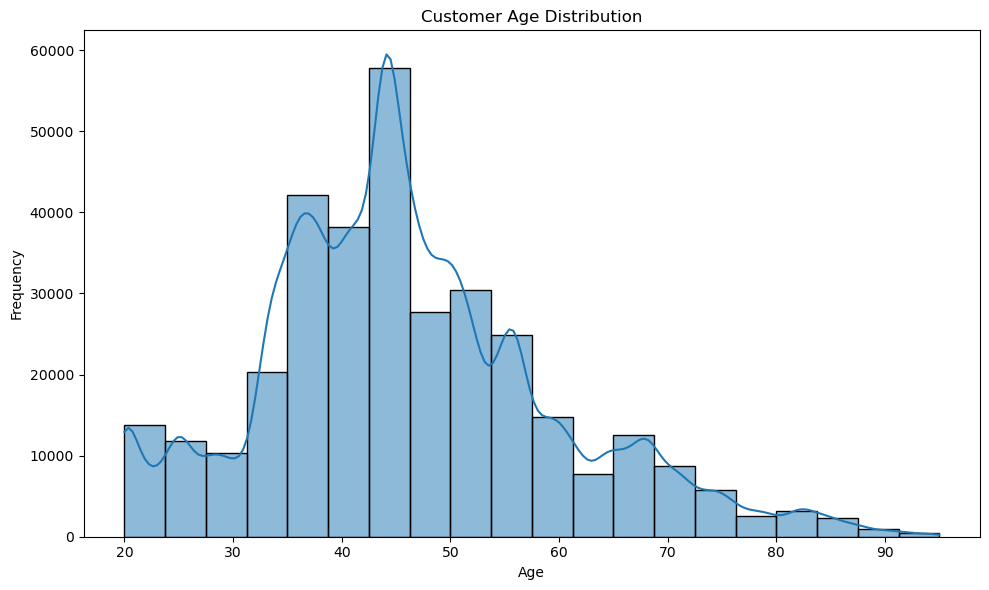

In [264]:
plt.figure(figsize=(10,6))
sns.histplot(valid_sales_df['age'], bins=20, kde=True)
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

C:\Users\Elizabeth S\AppData\Local\Temp\ipykernel_27684\4136406505.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='age_group', y='total_quantity_sold', data=age_group_summary, palette='viridis')


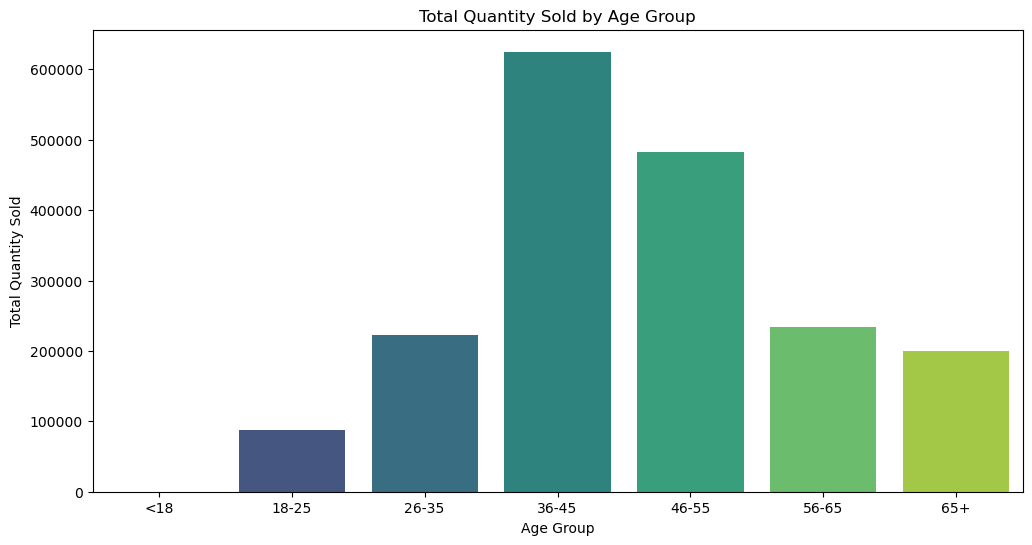

C:\Users\Elizabeth S\AppData\Local\Temp\ipykernel_27684\4136406505.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='age_group', y='purchase_frequency', data=age_group_summary, palette='magma')


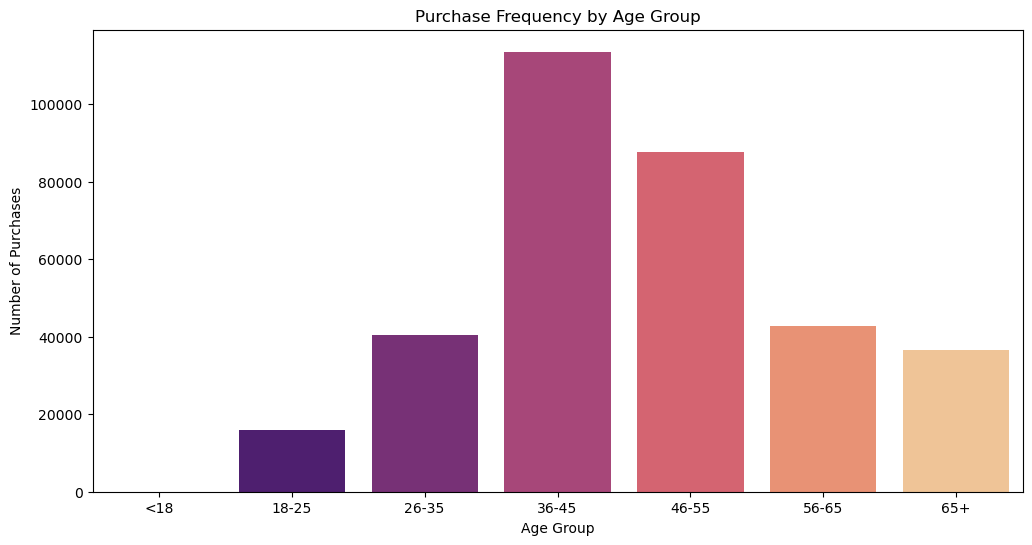

In [65]:
plt.figure(figsize=(12, 6))
sns.barplot(x='age_group', y='total_quantity_sold', data=age_group_summary, palette='viridis')
plt.title('Total Quantity Sold by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Quantity Sold')
plt.show()

# Visualization of Purchase Frequency by Age Group
plt.figure(figsize=(12, 6))
sns.barplot(x='age_group', y='purchase_frequency', data=age_group_summary, palette='magma')
plt.title('Purchase Frequency by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Purchases')
plt.show()

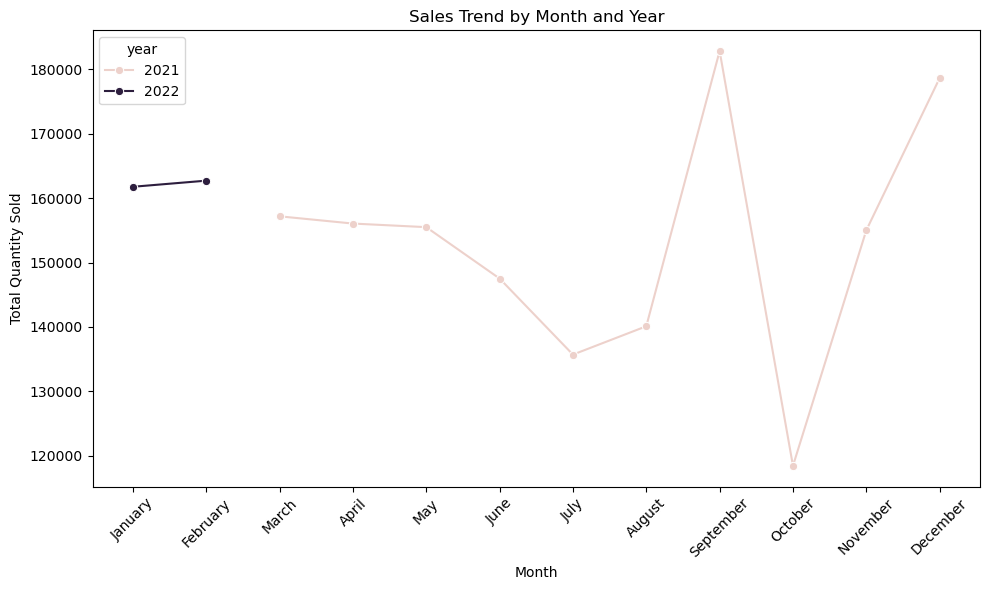

In [260]:
# Group data by year and month for the trend analysis
sales_trend = valid_sales_df.groupby(['year', 'month']).agg({'quantity_sold': 'sum'}).reset_index()
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
sales_trend['month'] = pd.Categorical(sales_trend['month'], categories=month_order, ordered=True)
plt.figure(figsize=(10,6))
sns.lineplot(x='month', y='quantity_sold', hue='year', data=sales_trend, marker='o')
plt.title('Sales Trend by Month and Year')
plt.xlabel('Month')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [81]:
sales_by_date_and_category = valid_sales_df.groupby(['month', 'category']).agg(
    total_sales=('id_prod', 'count'),
    total_revenue=('price', 'sum')
).reset_index()

print(sales_by_date_and_category.head())
print("<=================================================>")
sales_by_date_and_category

    month     category  total_sales  total_revenue
0   April  Accessoires         7579      156138.35
1   April      Montres         1501      111682.70
2   April    Vêtements        19321      205159.67
3  August  Accessoires         7954      162991.38
4  August      Montres         1948      148635.99
<=================================================>


month     category  total_sales  total_revenue
0       April  Accessoires         7579      156138.35
1       April      Montres         1501      111682.70
2       April    Vêtements        19321      205159.67
3      August  Accessoires         7954      162991.38
4      August      Montres         1948      148635.99
5      August    Vêtements        15708      167677.82
6    December  Accessoires        12259      251026.75
7    December      Montres          876       65934.49
8    December    Vêtements        19282      205976.44
9    February  Accessoires        10459      213120.64
10   February      Montres         1835      136479.72
11   February    Vêtements        17262      183140.52
12    January  Accessoires        12560      256267.92
13    January      Montres         1370      102524.72
14    January    Vêtements        15381      164162.67
15       July  Accessoires         9169      188523.27
16       July      Montres         1978      147663.47
17       July    Vêtements        13565      144711.92
18       June  Accessoires         9264      189162.04
19       June      Montres         1669      124209.56
20       June    Vêtements        15879      167886.34
21      March  Accessoires         9134      186974.17
22      March      Montres         1315       98771.48
23      March    Vêtements        18110      193566.38
24        May  Accessoires         8107      165893.40
25        May      Montres         1653      127359.59
26        May    Vêtements        18477      196114.96
27   November  Accessoires        12316      252910.39
28   November      Montres         1373      104136.00
29   November    Vêtements        14578      155843.78
30    October  Accessoires         1666       33762.32
31    October      Montres         1160       86179.70
32    October    Vêtements        18751      199217.94
33  September  Accessoires         9268      190613.78
34  September      Montres          874       65893.29
35  September    Vêtements        23112      246264.21

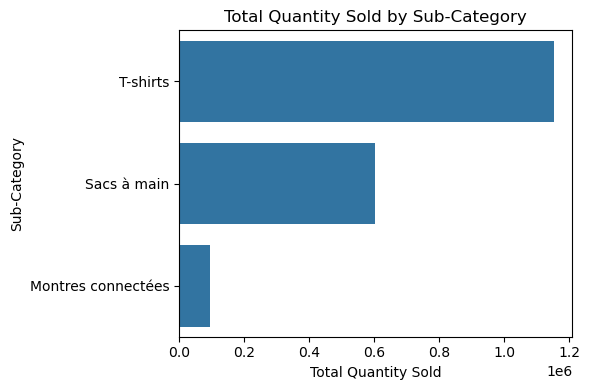

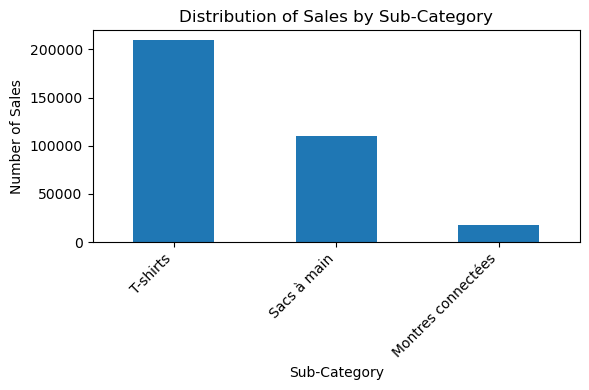

In [59]:
sub_category_sales = valid_sales_df.groupby('sub_category')['quantity_sold'].sum().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(x='quantity_sold', y='sub_category', data=sub_category_sales.sort_values('quantity_sold', ascending=False))
plt.title('Total Quantity Sold by Sub-Category')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Sub-Category')
plt.tight_layout()
plt.show()

sub_category_sales = valid_sales_df['sub_category'].value_counts()

plt.figure(figsize=(6,4))
sub_category_sales.plot(kind='bar')
plt.title('Distribution of Sales by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

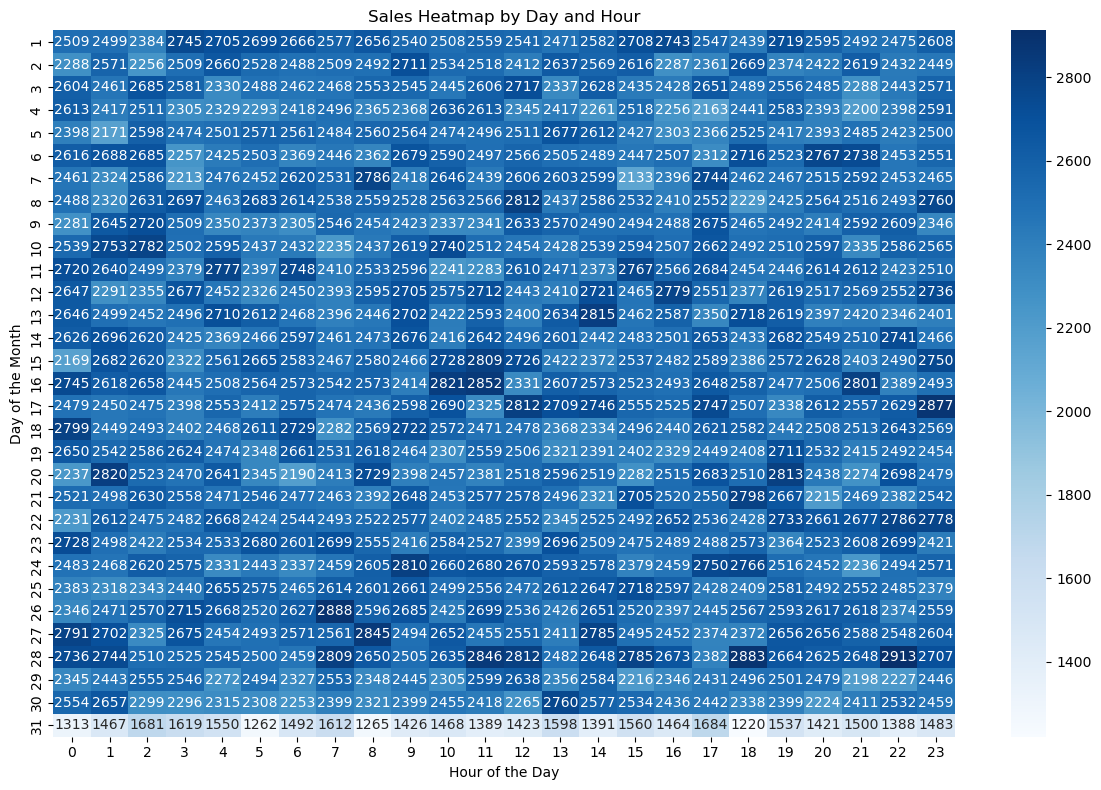

In [271]:
valid_sales_df['hour'] = pd.to_datetime(valid_sales_df['time'], format='%H:%M:%S').dt.hour

sales_heatmap = valid_sales_df.pivot_table(index='day', columns='hour', values='quantity_sold', aggfunc='sum', fill_value=0)
plt.figure(figsize=(12,8))
sns.heatmap(sales_heatmap, cmap='Blues', annot=True, fmt='.0f')
plt.title('Sales Heatmap by Day and Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Month')
plt.tight_layout()
plt.show()

## Age Distribution of Customers Making Purchases Early Morning (12 AM - 5 AM)

In [274]:
valid_sales_df['hour'] = pd.to_datetime(valid_sales_df['time'], format='%H:%M:%S').dt.hour

def classify_time(hour):
    if 0 <= hour <= 5:
        return 'Early Morning (12 AM - 5 AM)'
    elif 6 <= hour <= 11:
        return 'Morning (6 AM - 11 AM)'
    elif 12 <= hour <= 17:
        return 'Afternoon (12 PM - 5 PM)'
    else:
        return 'Evening (6 PM - 11 PM)'

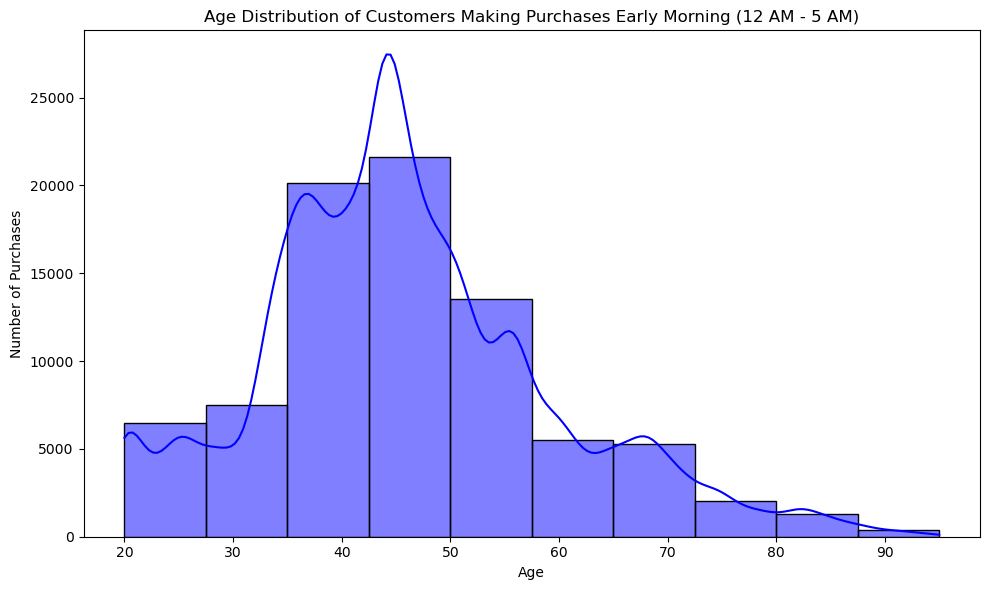

In [276]:
early_morning_sales = valid_sales_df[valid_sales_df['day_part'] == 'Early Morning (12 AM - 5 AM)']

plt.figure(figsize=(10,6))
sns.histplot(early_morning_sales['age'], bins=10, kde=True, color='blue')
plt.title('Age Distribution of Customers Making Purchases Early Morning (12 AM - 5 AM)')
plt.xlabel('Age')
plt.ylabel('Number of Purchases')
plt.tight_layout()
plt.show()

In [288]:
age_category_sales = valid_sales_df.groupby(['age', 'category']).agg({'quantity_sold': 'sum'}).reset_index()

top_category_by_age = age_category_sales.loc[age_category_sales.groupby('age')['quantity_sold'].idxmax()]

top_category_by_age

age     category  quantity_sold
1     20      Montres          16004
4     21      Montres           4736
7     22      Montres           4758
10    23      Montres           4533
13    24      Montres           4615
..   ...          ...            ...
213   91  Accessoires            487
216   92  Accessoires            487
219   93  Accessoires            252
222   94  Accessoires            379
225   95  Accessoires            293

[76 rows x 3 columns]

In [292]:
repeat_customers = valid_sales_df['client_id'].value_counts()
repeat_customers = repeat_customers[repeat_customers > 1]

repeat_sales = valid_sales_df[valid_sales_df['client_id'].isin(repeat_customers.index)]

repeat_sales_behavior = repeat_sales.groupby('client_id').agg({
    'quantity_sold': 'sum',
    'total_spending': 'sum'
}).reset_index()

repeat_sales_behavior


client_id  quantity_sold  total_spending
0          c_1             99         1365.38
1         c_10            147         3254.08
2        c_100             36          869.22
3       c_1000            342         5694.71
4       c_1001            325         6964.06
...        ...            ...             ...
8559     c_995             43          671.38
8560     c_996            238         4504.60
8561     c_997            133         3400.19
8562     c_998            151         9556.40
8563     c_999            117         1559.18

[8564 rows x 3 columns]

### Total Sales by Weekday

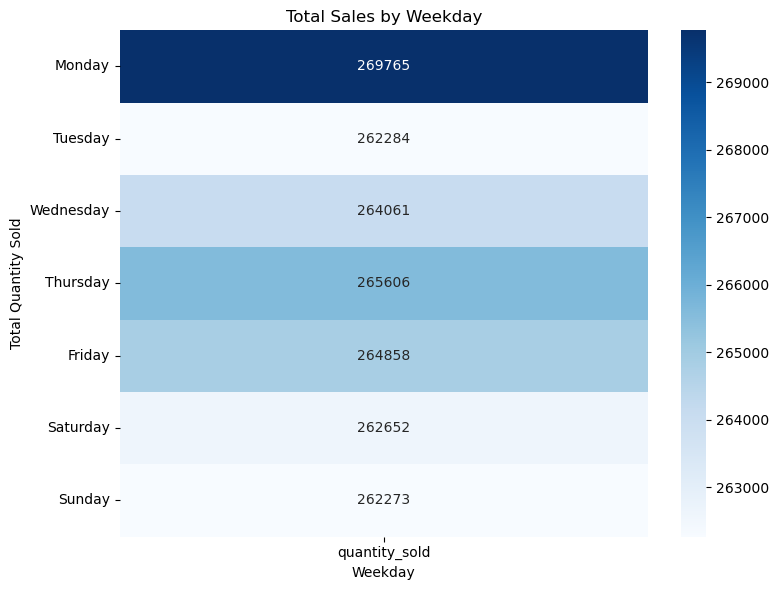

In [294]:
valid_sales_df['weekday'] = pd.to_datetime(valid_sales_df['year'].astype(str) + '-' + valid_sales_df['month'] + '-' + valid_sales_df['day'].astype(str)).dt.day_name()

sales_by_weekday = valid_sales_df.pivot_table(index='weekday', values='quantity_sold', aggfunc='sum').reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(8,6))
sns.heatmap(sales_by_weekday, cmap='Blues', annot=True, fmt='.0f')
plt.title('Total Sales by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Total Quantity Sold')
plt.tight_layout()
plt.show()


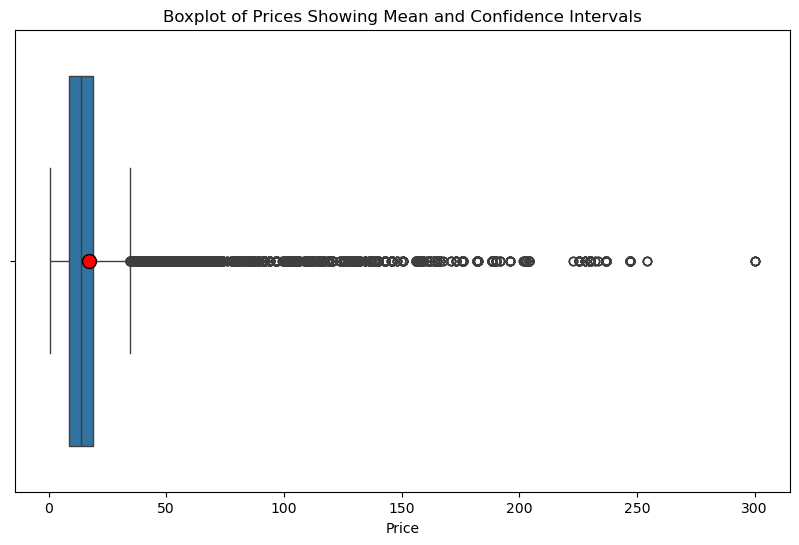

In [149]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=valid_sales_df['price'], showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"red", 
                       "markeredgecolor":"black",
                       "markersize":"10"})
plt.title('Boxplot of Prices Showing Mean and Confidence Intervals')
plt.xlabel('Price')
plt.show()

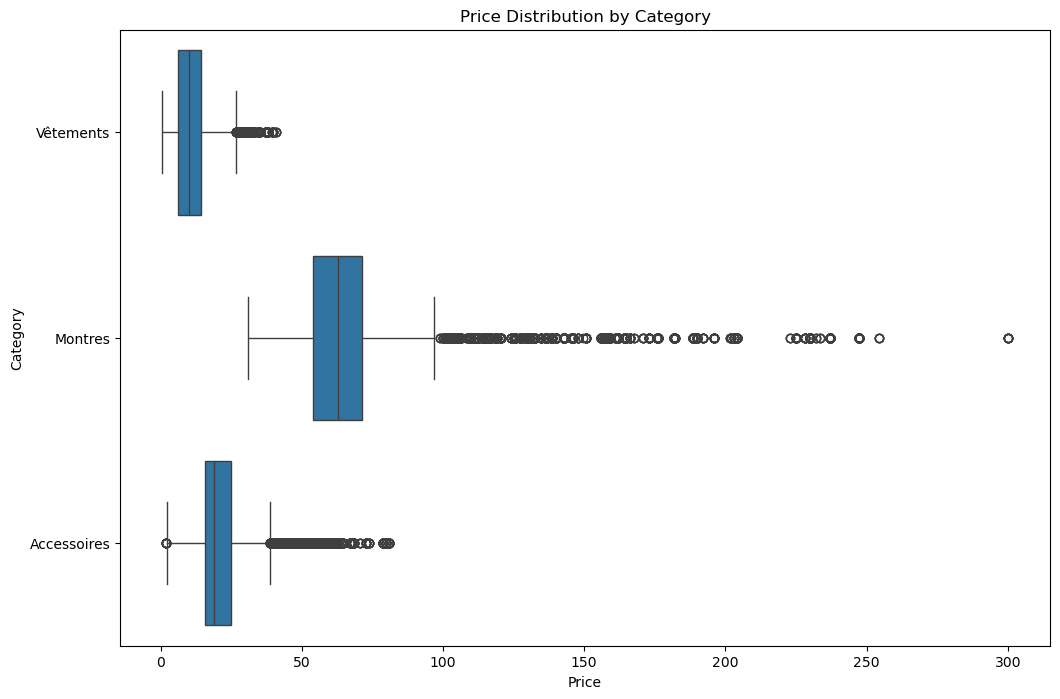

In [147]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='price', y='category', data=valid_sales_df)
plt.title('Price Distribution by Category')
plt.xlabel('Price')
plt.ylabel('Category')
plt.show()

In [89]:
sales_by_day_of_week = valid_sales_df.groupby('year').agg(
    total_sales=('id_prod', 'count'),
    total_revenue=('price', 'sum')
).reset_index()

print(sales_by_day_of_week.head())

   year  total_sales  total_revenue
0  2021       277933     4740881.58
1  2022        58883     1055696.19


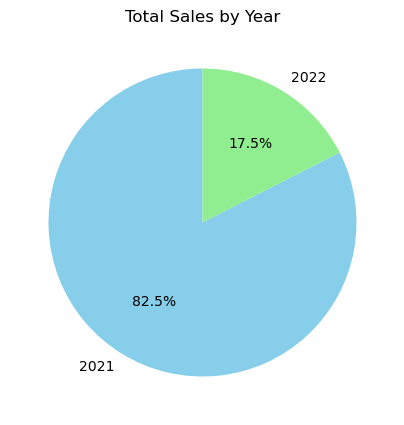

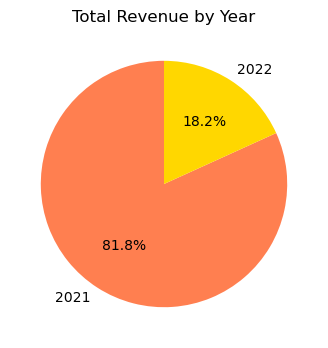

In [91]:
plt.figure(figsize=(5, 5))
plt.pie(sales_by_day_of_week['total_sales'], labels=sales_by_day_of_week['year'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen'])
plt.title('Total Sales by Year')
plt.show()

plt.figure(figsize=(4, 4))
plt.pie(sales_by_day_of_week['total_revenue'], labels=sales_by_day_of_week['year'], autopct='%1.1f%%', startangle=90, colors=['coral', 'gold'])
plt.title('Total Revenue by Year')
plt.show()

In [85]:
#!pip install ydata-profiling

In [63]:
from ydata_profiling import ProfileReport

In [67]:
valid_sales_df.head()

id_prod  year      month  day      time session_id client_id  quantity_sold  \
0  0_1483  2021      April   10  18:37:28    s_18746    c_4450              5   
1   2_226  2022   February    3  01:55:53   s_159142     c_277              6   
2   1_374  2021  September   23  15:13:46    s_94290    c_4270              3   
3  0_2186  2021    October   17  03:27:18   s_105936    c_4597              8   
4  0_1351  2021       July   17  20:34:25    s_63642    c_1242              2   

  product_id     category        sub_category  price  stock_quantity  birth  \
0     0_1483    Vêtements            T-shirts   4.99            48.0   1977   
1      2_226      Montres  Montres connectées  65.75            63.0   2000   
2      1_374  Accessoires         Sacs à main  10.71            97.0   1979   
3     0_2186    Vêtements            T-shirts   4.20            57.0   1963   
4     0_1351    Vêtements            T-shirts   8.99            59.0   1980   

   age  
0   47  
1   24  
2   45  
3   61  
4   44

In [71]:
valid_sales_profile = ProfileReport(valid_sales_df, title="Profiling Report")

In [73]:
valid_sales_profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]